# Alpha Optimization in a Gauss-Markov Mobility Model


In [1]:
import sys
from pathlib import Path
sys.path.append(f"{Path().absolute().parent}")

In [2]:
import pandas as pd
import scipy
import numpy as np
from radp_library import *
import matplotlib.pyplot as plt
from matplotlib import cm

In [3]:
params = {
    "ue_tracks_generation": {
            "params": {
                "simulation_duration": 3600,
                "simulation_time_interval_seconds": 0.01,
                "num_ticks": 50,
                "num_batches": 1,
                "ue_class_distribution": {
                    "stationary": {
                        "count": 10,
                        "velocity": 0,
                        "velocity_variance": 1
                    },
                    "pedestrian": {
                        "count": 5,
                        "velocity": 2,
                        "velocity_variance": 1
                    },
                    "cyclist": {
                        "count": 5,
                        "velocity": 5,
                        "velocity_variance": 1
                    },
                    "car": {
                        "count": 12,
                        "velocity": 20,
                        "velocity_variance": 1
                    }
                },
                "lat_lon_boundaries": {
                    "min_lat": -90,
                    "max_lat": 90,
                    "min_lon": -180,
                    "max_lon": 180
                },
                "gauss_markov_params": {
                    "alpha": 0.5,
                    "variance": 0.8,
                    "rng_seed": 42,
                    "lon_x_dims": 100,
                    "lon_y_dims": 100,
                    "// TODO": "Account for supporting the user choosing the anchor_loc and cov_around_anchor.",
                    "// Current implementation": "the UE Tracks generator will not be using these values.",
                    "// anchor_loc": {},
                    "// cov_around_anchor": {}
                }
            }
        }
}

## Alpha Initialization

In [4]:
alpha0 = params['ue_tracks_generation']['params']['gauss_markov_params']['alpha']

In [5]:
print("Alpha0:",alpha0)

Alpha0: 0.5


## Generate Data Set 1

In [6]:
data1 = get_ue_data(params)

In [7]:
data1.head(10)

,mock_ue_id,lon,lat,tick
0,0,48.510339,-16.462645,0
1,1,19.286613,63.617111,0
2,2,21.315702,-47.889952,0
3,3,-70.559364,-79.511709,0
4,4,-168.916011,-39.338640,0
5,5,-22.782612,-37.153882,0
6,6,-102.768980,29.143574,0
7,7,166.307994,39.080475,0
8,8,147.065811,-9.083256,0
9,9,71.810258,-41.019425,0


## Plot Dataset 1 

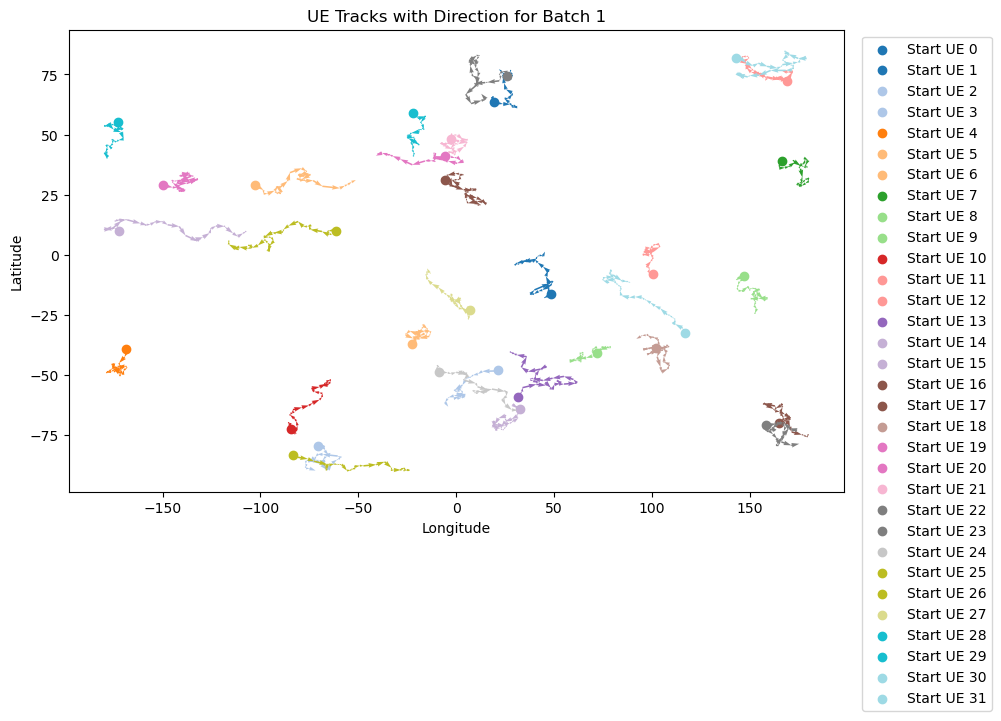

In [8]:
plot_ue_tracks(data1)

In [9]:
velocity = preprocess_ue_data(data1)

In [10]:
velocity

mock_ue_id         lon        lat  tick   velocity
mock_ue_id                                                         
0          0              0   48.510339 -16.462645     0   0.000000
           32             0   49.168914 -16.110212     1  11.296860
           64             0   49.052688 -16.110079     2   9.427962
           96             0   49.462674 -15.586685     3  11.197592
           128            0   47.627544 -16.843888     4  12.392391
...                     ...         ...        ...   ...        ...
31         1471          31  146.447705  73.500910    45  10.513812
           1503          31  146.332655  73.750325    46  10.239940
           1535          31  145.913834  75.088871    47  11.915257
           1567          31  144.383588  75.588069    48  11.160976
           1599          31  146.478589  74.187621    49  12.027603

[1600 rows x 5 columns]

## Regress to Find Alpha 1

In [11]:
alpha1 = get_predicted_alpha(data1,alpha0)

In [12]:
alpha1

0.5000000460688152

## Generating new data using alpha 1


In [13]:
params['ue_tracks_generation']['params']['gauss_markov_params']['alpha'] = alpha1
data2 = get_ue_data(params)

In [14]:
print(params['ue_tracks_generation']['params']['gauss_markov_params']['alpha'])

0.5000000460688152


In [15]:
data2

,mock_ue_id,lon,lat,tick
0,0,48.510339,-16.462645,0
1,1,19.286613,63.617111,0
2,2,21.315702,-47.889952,0
3,3,-70.559364,-79.511709,0
4,4,-168.916011,-39.338640,0
...,...,...,...,...
1595,27,-14.856604,-5.730164,49
1596,28,-22.307316,40.806648,49
1597,29,-179.236706,41.434853,49
1598,30,89.100351,-11.651078,49


## Plot Dataset 2

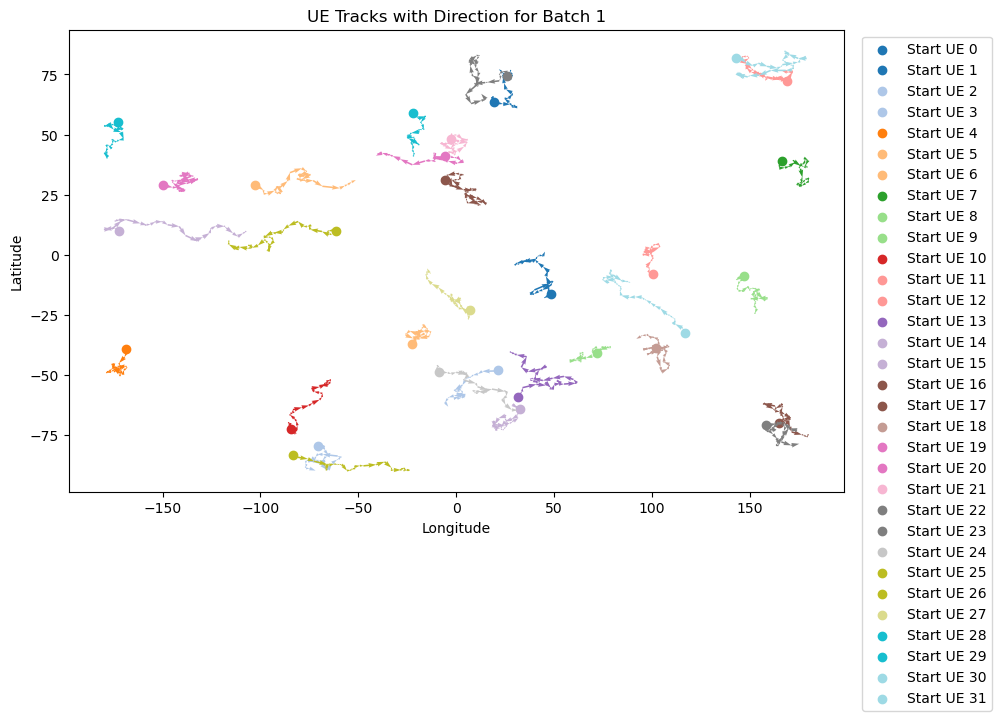

In [16]:
plot_ue_tracks(data2)

## Regress to Find Alpha 2

In [17]:
alpha2 =  get_predicted_alpha(data1,alpha1)

In [18]:
alpha2

0.5000000522796194

## Comparison Plot of Dataset 1 and Dataset2

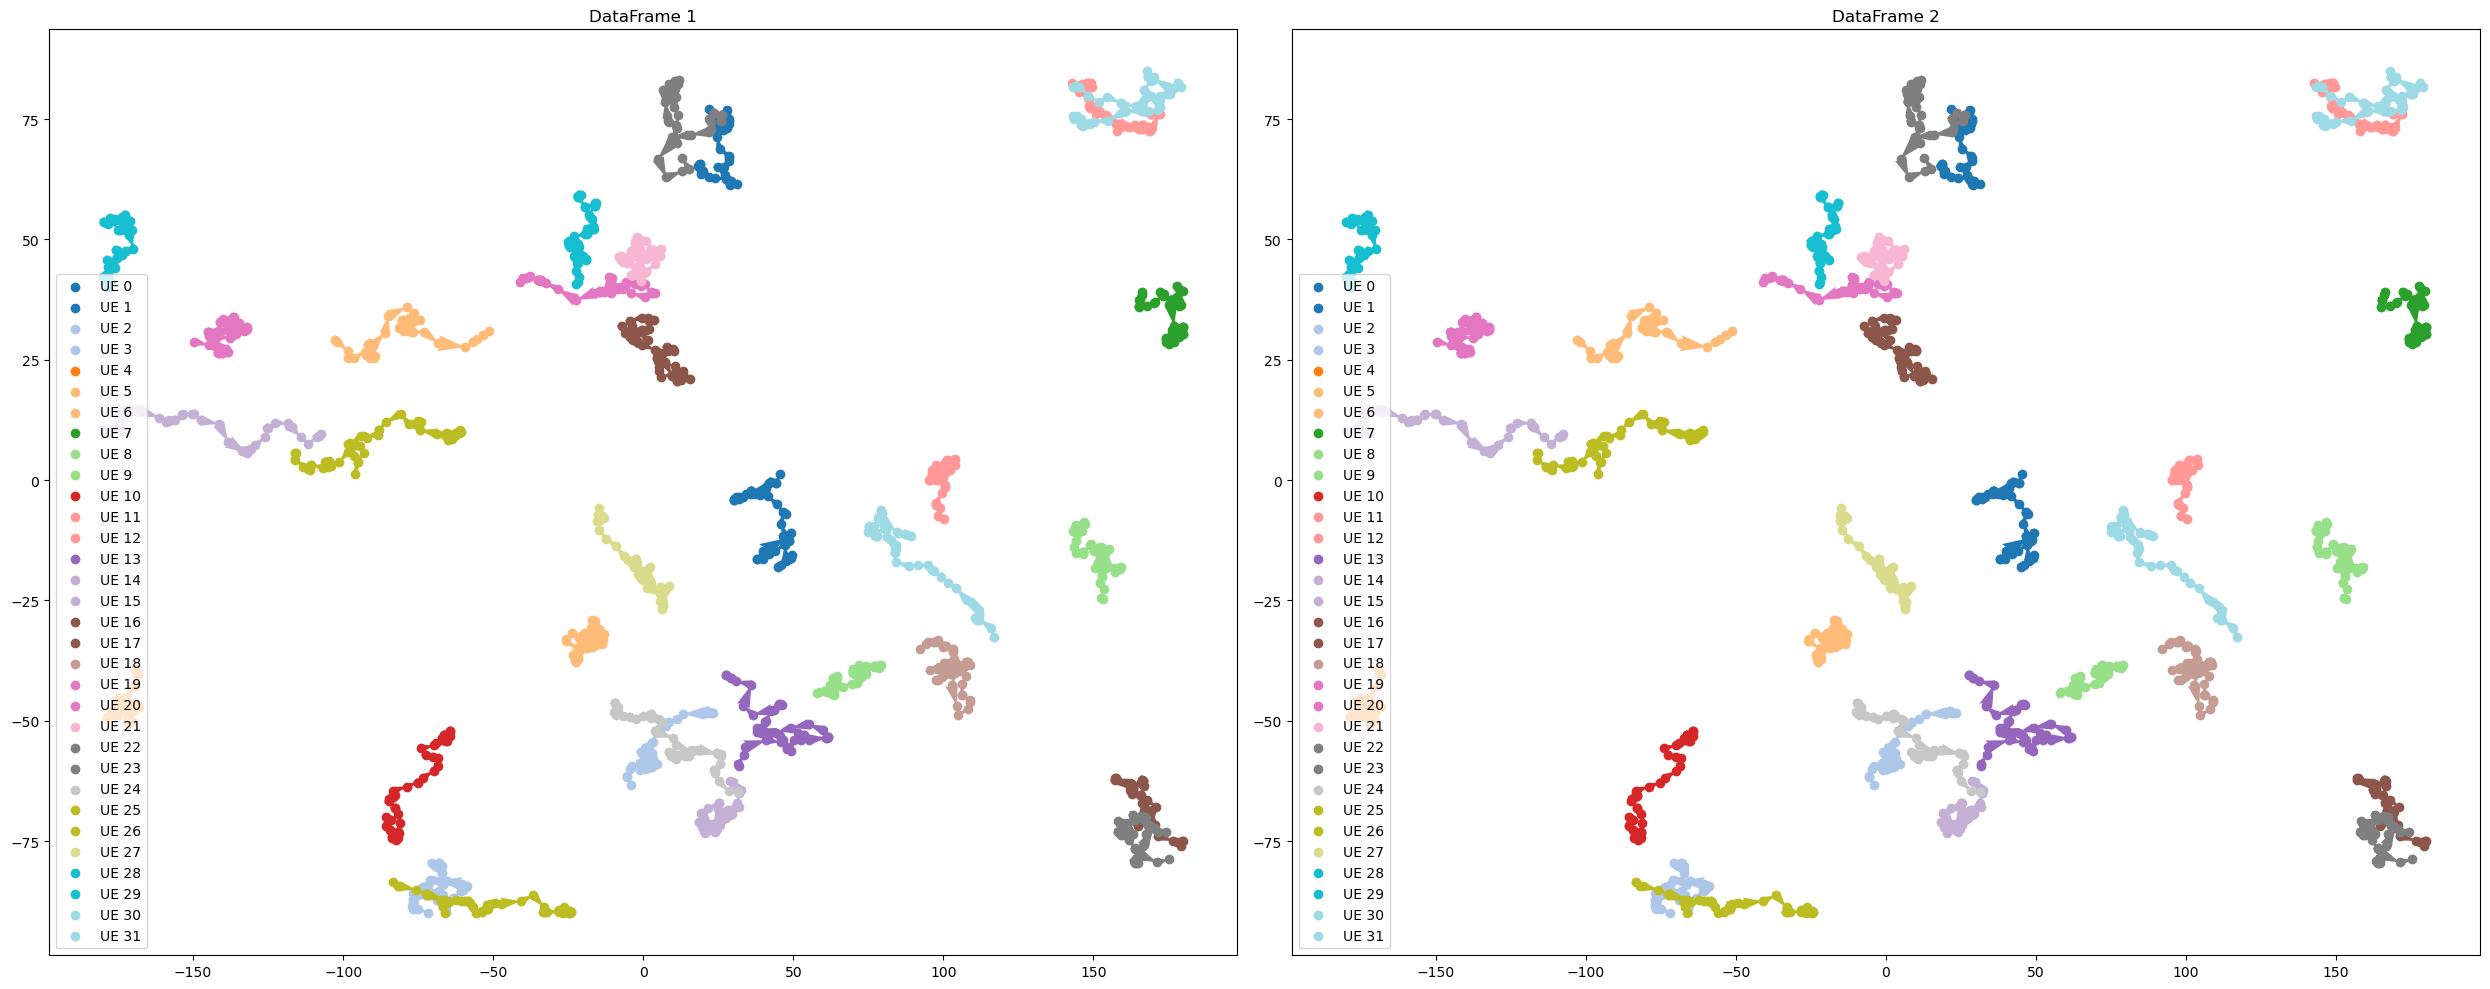

In [19]:
plot_ue_tracks_side_by_side(data1, data2)